In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np

In [4]:
files = ['george', 'phillip', 'woody', 'francesco', 'steph']

In [5]:
def clusteringByPerson(file):
    data = pd.read_csv('export_all_'+file+'.csv')
    
    data['DIFERENCA_TEMPO'] = data['TEMPO_PLAN'] - data['TEMPO_REAL']
    
    X = data[['TEMPO_PLAN', 'DIFERENCA_TEMPO']]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    num_clusters = 3
    
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    
    data['CLUSTER'] = kmeans.labels_
    
    centroids = scaler.inverse_transform(kmeans.cluster_centers_)
    
    labels = ['Susceptível para erro', 'Acerto', 'Indiferente']
    labels_clusters = []
    
    plt.figure(figsize=(8, 6))
    
    for cluster in range(num_clusters):
        cluster_data = data[data['CLUSTER'] == cluster]
        plt.scatter(cluster_data['TEMPO_PLAN'], cluster_data['DIFERENCA_TEMPO'], label=f'Cluster {cluster}', alpha=0.7)
    
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='o', label='Centroids')
    
    plt.xlabel('Tempo Planejado')
    plt.ylabel('Diferença de tempo')
    plt.title('Tempo Previsto vs Diferença do Tempo - '+file.capitalize())
    plt.legend()
    plt.grid(True)
    plt.savefig(file+'_all_grid.png')
    plt.show()
    
    centroids = scaler.inverse_transform(kmeans.cluster_centers_)
    print("Centroids dos clusters:")
    print(centroids)
    
    inercia = kmeans.inertia_
    print("Inércia:", inercia)
    
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    print("Silhouette Score:", silhouette_avg)

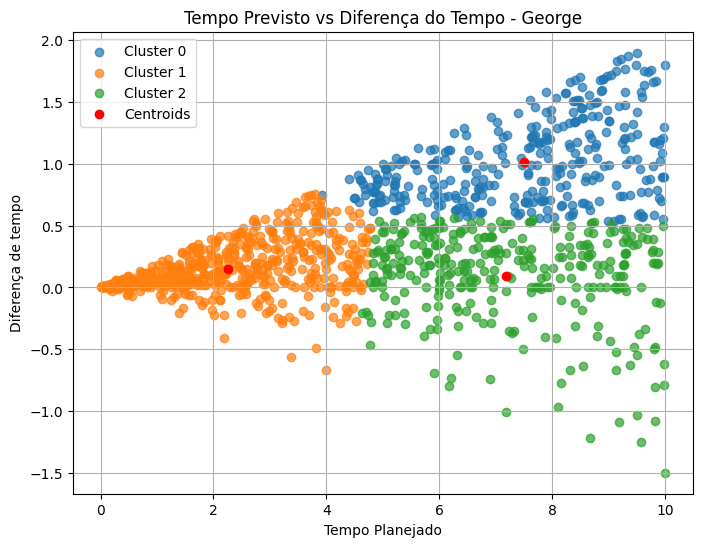

Centroids dos clusters:
[[7.5091369  1.0141369 ]
 [2.25292948 0.15036166]
 [7.19298137 0.09506211]]
Inércia: 735.9979176679127
Silhouette Score: 0.4557151839447439


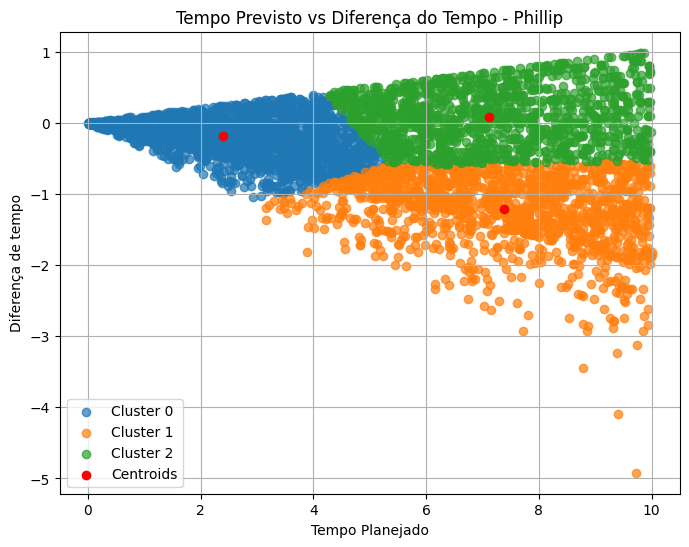

Centroids dos clusters:
[[ 2.38845415 -0.17861572]
 [ 7.37706696 -1.21138282]
 [ 7.11376261  0.08818464]]
Inércia: 3023.9919371151805
Silhouette Score: 0.46587759541638185


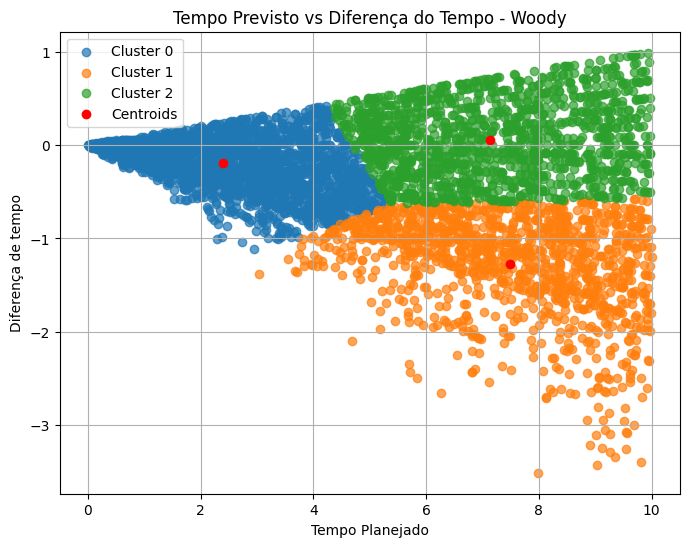

Centroids dos clusters:
[[ 2.39722755 -0.19439407]
 [ 7.48419967 -1.274967  ]
 [ 7.12736081  0.05554591]]
Inércia: 3032.1476059081297
Silhouette Score: 0.4608137126711404


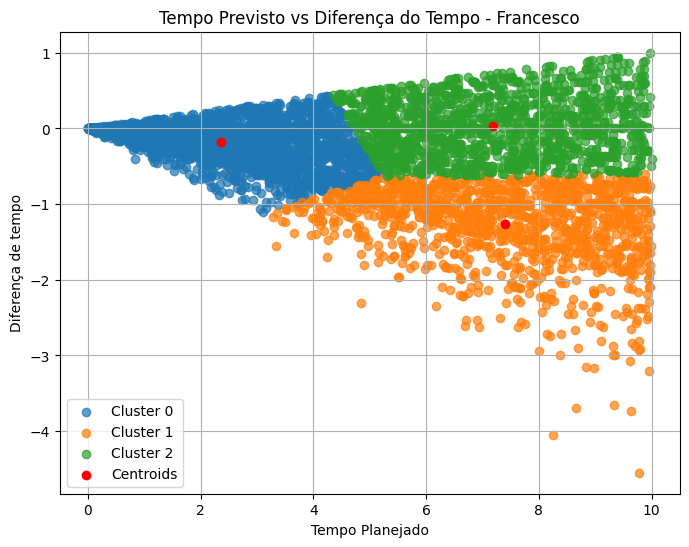

Centroids dos clusters:
[[ 2.35908972 -0.17700348]
 [ 7.40217288 -1.2677954 ]
 [ 7.17961567  0.02724943]]
Inércia: 2995.098855956606
Silhouette Score: 0.4642288602315753


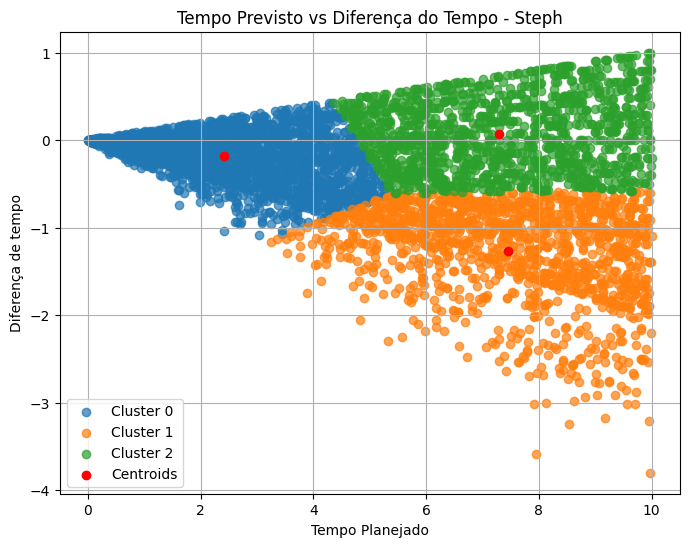

Centroids dos clusters:
[[ 2.40913613 -0.18188918]
 [ 7.44849366 -1.2607308 ]
 [ 7.29224031  0.07296899]]
Inércia: 3026.062007129724
Silhouette Score: 0.4656372950942434


In [6]:
for file in files:
    clusteringByPerson(file)

In [12]:
def clusteringByPersonAndProduct(file):
    data = pd.read_csv('export_prod_'+file+'.csv')
    
    data['DIFERENCA_TEMPO'] = data['TEMPO_PLAN'] - data['TEMPO_REAL']
    
    X = data[['DIFERENCA_TEMPO', 'TEMPO_PLAN', 'PRODUTO']]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X.drop(columns=['PRODUTO']))  # Excluindo a coluna 'PRODUTO' da padronização
    
    num_clusters = 3
    
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    
    data['CLUSTER'] = kmeans.labels_
    
    quantidade_por_cluster_produto = data.groupby(['PRODUTO', 'CLUSTER']).size().unstack(fill_value=0)
    
    legenda = ["Bom", "Regular", "Ruim"]
    ax = quantidade_por_cluster_produto.plot(kind='bar', stacked=True, figsize=(10, 6))
    
    plt.xlabel('Produto')
    plt.ylabel('Quantidade de Pontos')
    plt.title('Quantidade de Pontos em Cada Cluster para Cada Produto - '+file.capitalize())
    
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, legenda, title='Legenda')
    
    plt.grid(True)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(file+'_produto_grid.png')
    plt.show()
    

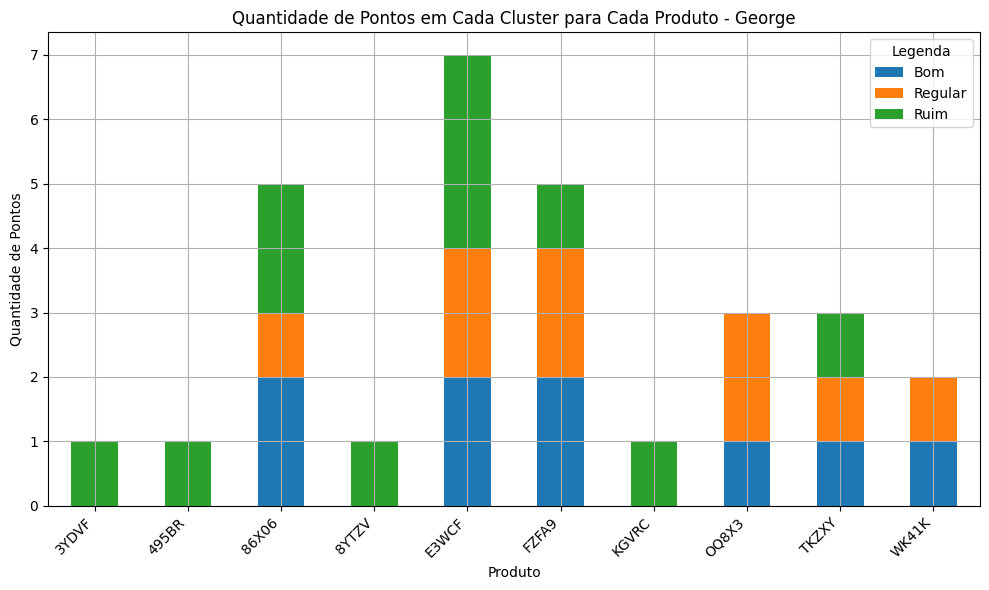

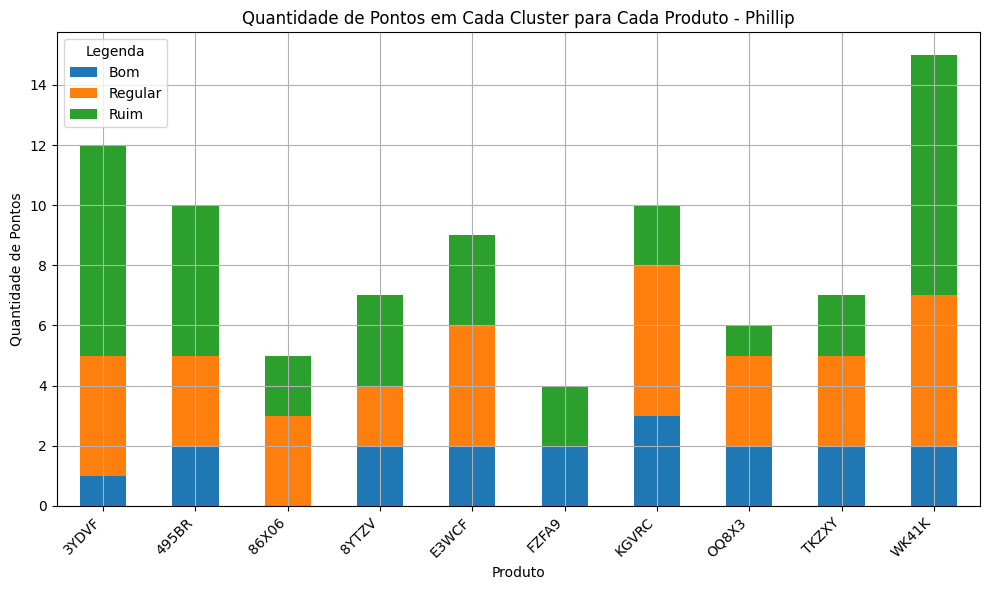

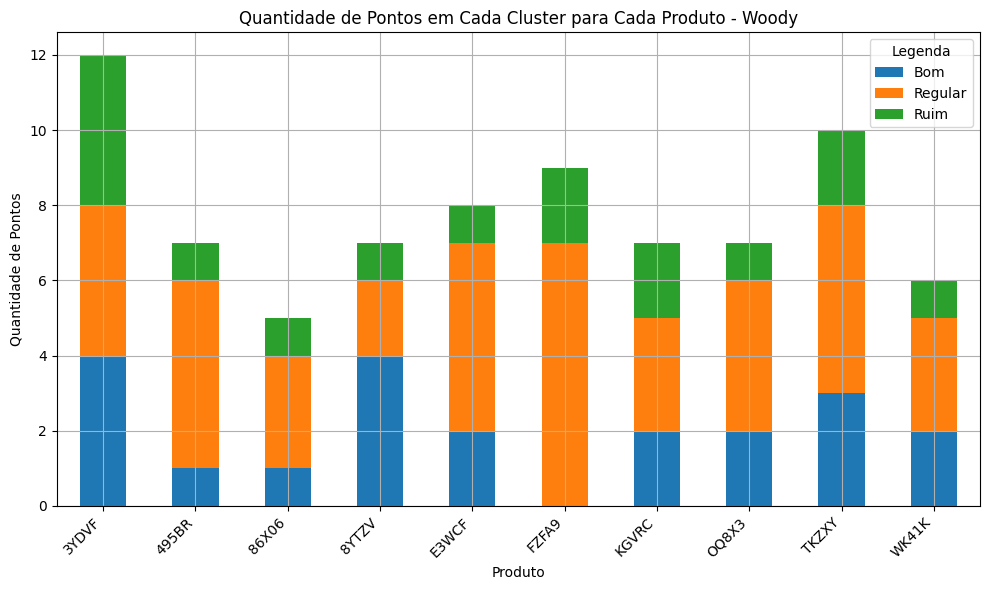

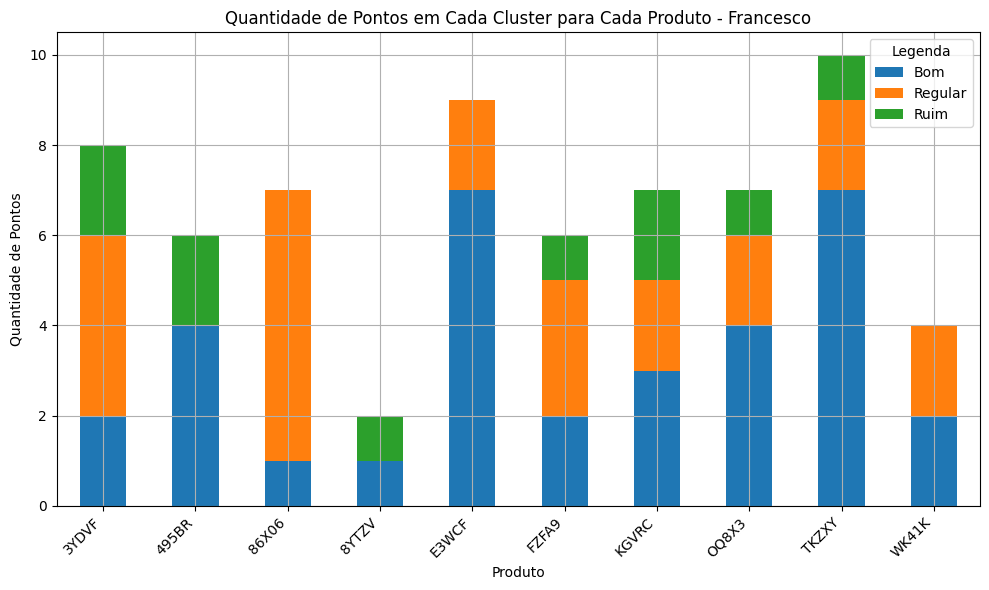

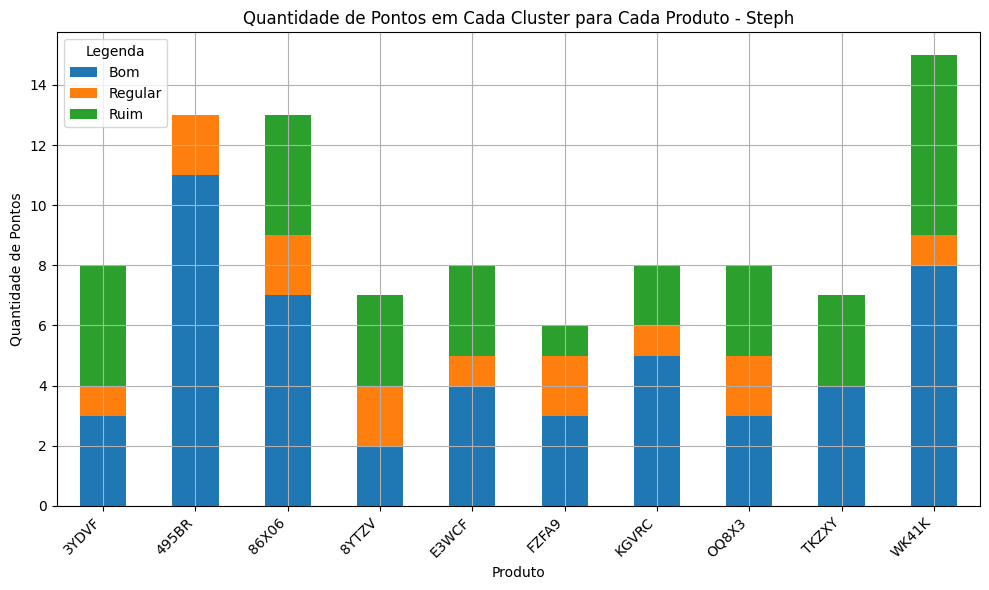

In [13]:
for file in files:
    clusteringByPersonAndProduct(file)